In [133]:
import pandas as pd
%matplotlib inline

In [134]:
df = pd.read_csv('../../../res/credit-card/credit-card-preprocessed.csv')
df = df.drop(columns=["CUST_ID"])

In [135]:
# Detect Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
# TODO: Add more description (percentage)

BALANCE                              695
BALANCE_FREQUENCY                   1492
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1365
dtype: int64

In [136]:
# Scale continuous features to give all features with equal importance
# Too sensitive for outliers
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# mms.fit(df)
# data_transformed = mms.transform(df)


In [137]:
# Scale data
# from sklearn.preprocessing import StandardScaler
# data_transformed = StandardScaler().fit_transform(df)

In [138]:
# robust scaler
# Robust scalar is used as it yielded the best results due to outliers in the data set
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_transformed = scaler.fit_transform(df)
# robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

In [139]:
# Reduce dimensions
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
data_transformed = pca_2.fit_transform(data_transformed)

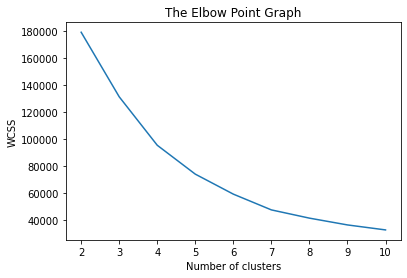

In [140]:
# Elbow Point Graph
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
wcss = []
kmeans_arr = []
for i in range(2, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
   kmeans.fit(data_transformed)
   kmeans_arr.append(kmeans)
   wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.7633354077931782
For n_clusters = 3 The average silhouette_score is : 0.7353961609744402
For n_clusters = 4 The average silhouette_score is : 0.6502975626222903
For n_clusters = 5 The average silhouette_score is : 0.5436939323825741
For n_clusters = 6 The average silhouette_score is : 0.5222200786419032
For n_clusters = 7 The average silhouette_score is : 0.5019117700021383
For n_clusters = 8 The average silhouette_score is : 0.43487720558735005
For n_clusters = 9 The average silhouette_score is : 0.4290079903948907
For n_clusters = 10 The average silhouette_score is : 0.3533246493315111


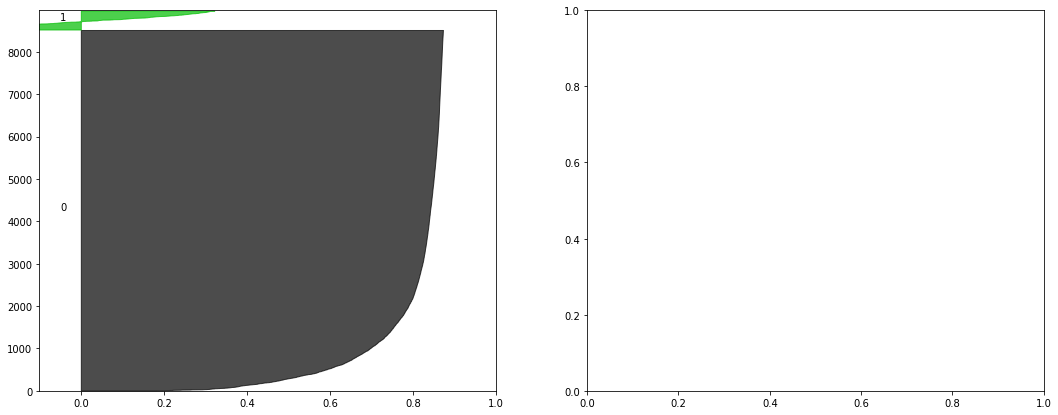

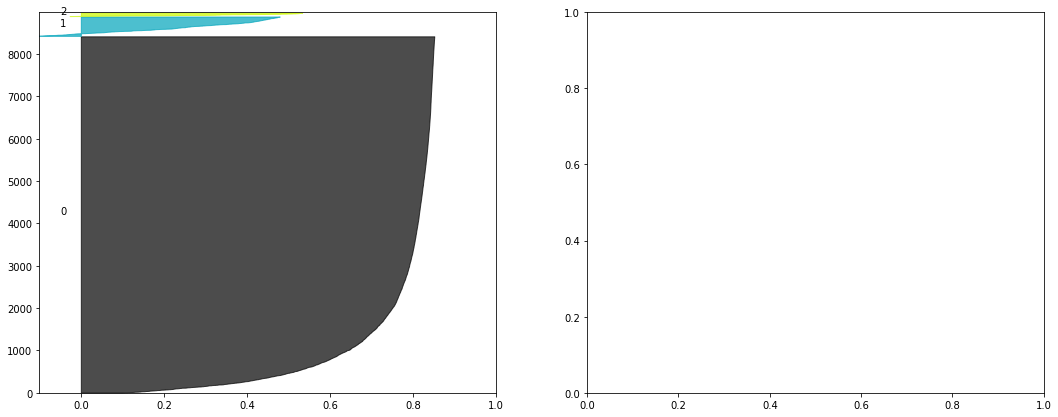

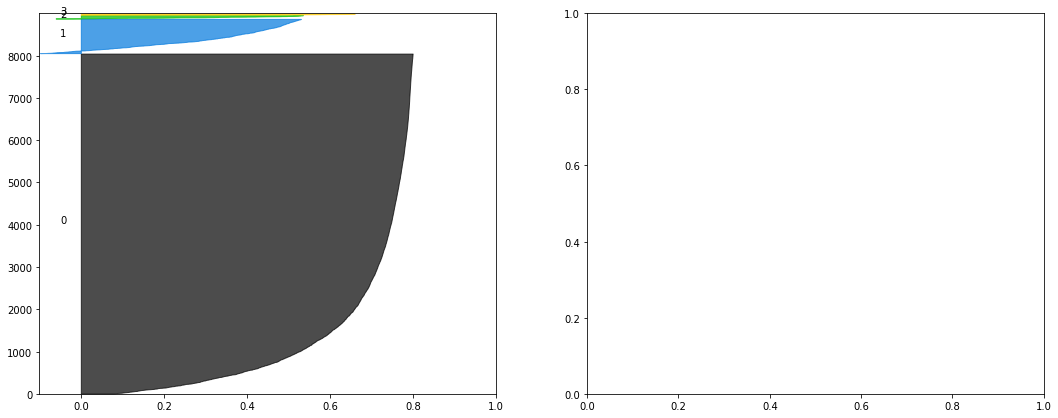

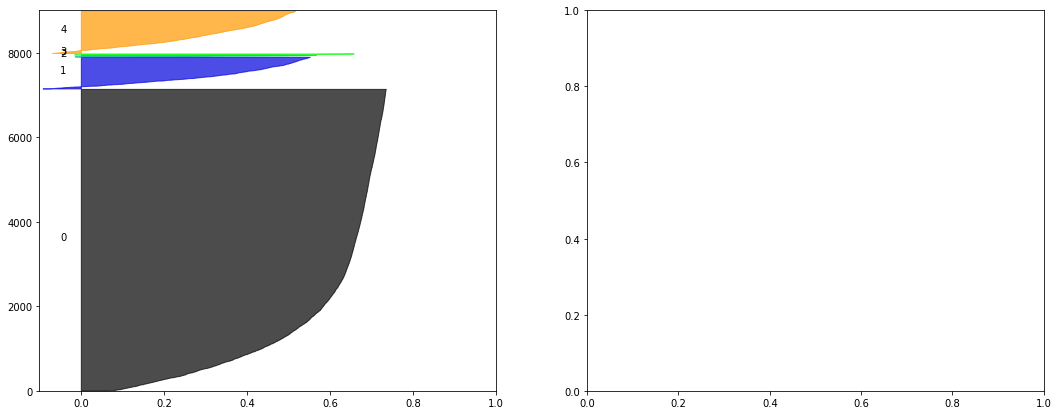

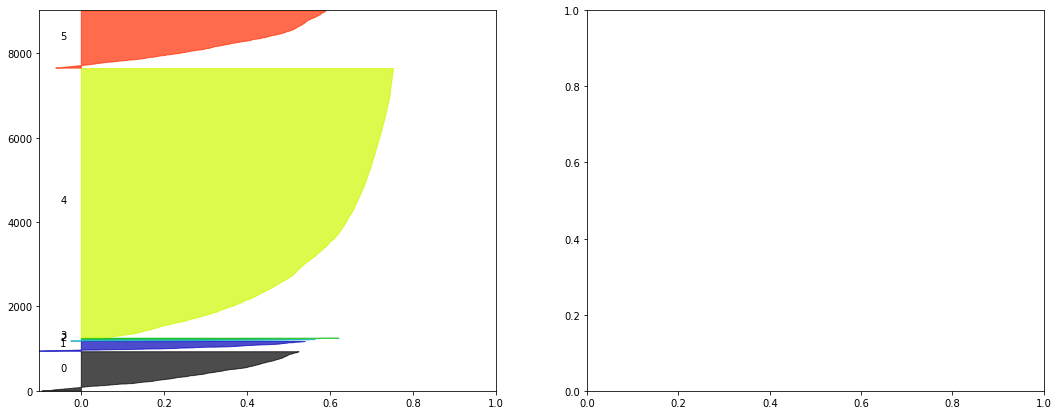

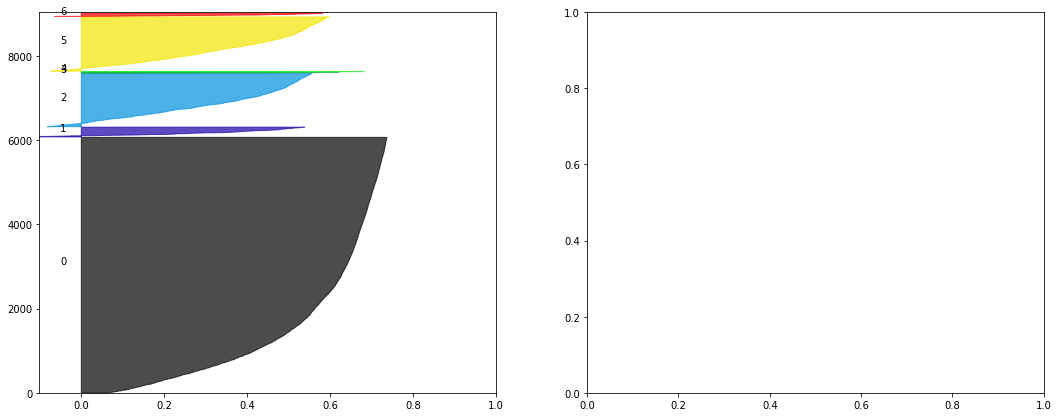

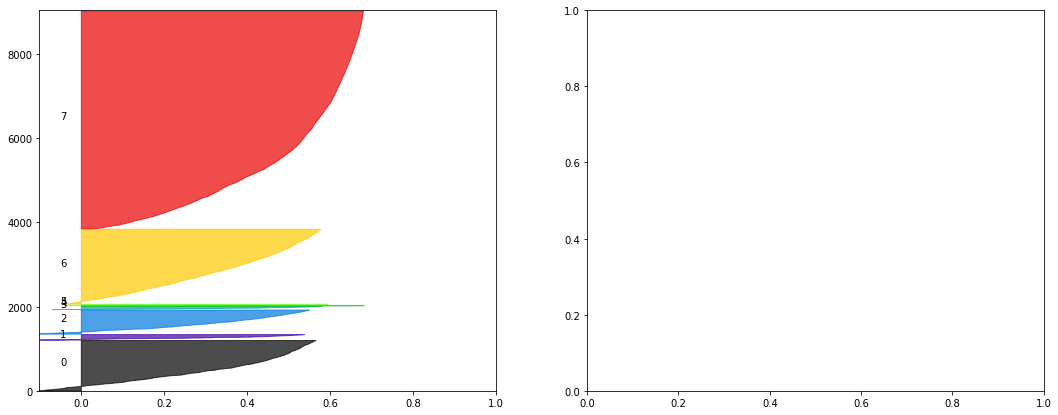

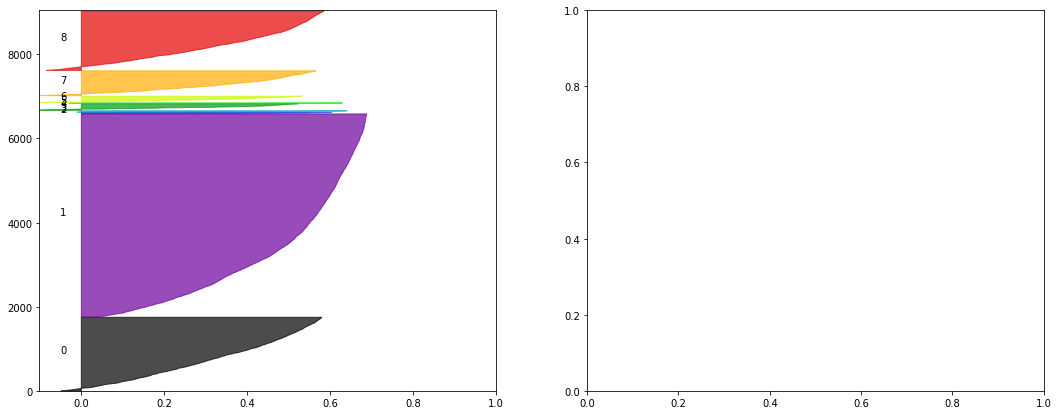

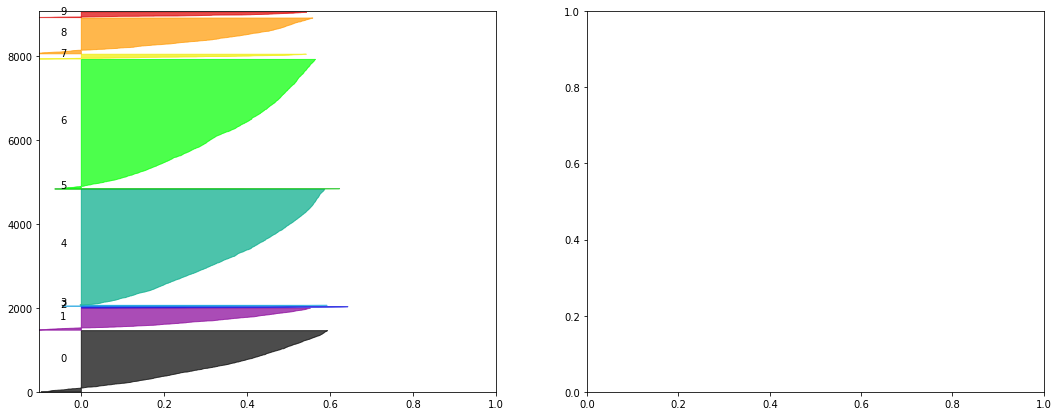

In [141]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
for n_clusters, kmeans in enumerate(kmeans_arr):
    # Add 2 two n_clusters since enumerate gives index 0 at the beginning
    # but the first Kmeans has 1 centroid
    if n_clusters >= 0:
        n_clusters = n_clusters + 2
   # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])

    cluster_labels = kmeans.predict(data_transformed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(
        data_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


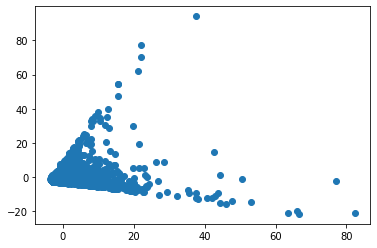

In [142]:
# Plot the scaled and reduced data
plt.scatter(data_transformed[:,0],data_transformed[:,1])
plt.show()

In [143]:
# Determine the metric score for every k number of clusters
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

clusters = []
davies = []
calinski = []

for cluster_num in range(2,11):
    km = KMeans(
    n_clusters=cluster_num, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )

    labels = km.fit_predict(data_transformed)
    clusters.append(cluster_num)
    davies.append(davies_bouldin_score(data_transformed, labels))
    calinski.append(calinski_harabasz_score(data_transformed, labels))

metrics_summary = pd.DataFrame()
metrics_summary["cluters"] = clusters
metrics_summary["davies"] = davies
metrics_summary["calinski"] = calinski

metrics_summary

,cluters,davies,calinski
0,2,0.959852,3811.249401
1,3,0.698244,4233.548364
2,4,0.643629,5012.190349
3,5,0.668053,5498.310272
4,6,0.654886,5953.801595
5,7,0.638485,6554.506562
6,8,0.690187,6641.168438
7,9,0.692081,6777.292483
8,10,0.744202,6819.930758


In [144]:
# Cluster that yielded that lowest davies score
metrics_summary[metrics_summary["davies"] == metrics_summary["davies"].min()]

,cluters,davies,calinski
5,7,0.638485,6554.506562


In [145]:
# Creation of Kmeans model
km = KMeans(
    n_clusters=7, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# Get labels of each row in dataframe
labels = km.fit_predict(data_transformed)


Clustered Visualization: 
Black point - Centroid


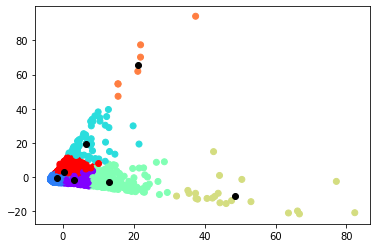

In [146]:
plt.scatter(data_transformed[:,0],data_transformed[:,1], c=km.labels_ ,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')
print("Clustered Visualization: ")
print("Black point - Centroid")
plt.show()

In [147]:
print("Davies_Bouldin_Score:",davies_bouldin_score(data_transformed, labels))
print("Calinski_Harabasz_Score:",calinski_harabasz_score(data_transformed, labels))

Davies_Bouldin_Score: 0.6384853022760931
Calinski_Harabasz_Score: 6554.506562428952


In [148]:
print("\nLabel Clusters: ")
print(np.unique(labels))

# Count all occurences of unique values in labels
counts = np.bincount(labels)
print("\nCount Occurrences per labels: ")
print(counts)

# Get centroid of each cluster
centroids = km.cluster_centers_
print("\nx,y of Centroids per cluster: ")
print(centroids)

# Append new column in dataframe
df["cluster"] = labels

# The last column corresponds to the cluster the row is categorized in
df.head()


Label Clusters: 
[0 1 2 3 4 5 6]

Count Occurrences per labels: 
[1283 6054   77  232   22    7 1274]

x,y of Centroids per cluster: 
[[  3.15620894  -1.71188469]
 [ -1.52899565  -0.513757  ]
 [  6.52480202  19.44825952]
 [ 13.16450163  -2.64810497]
 [ 48.63382051 -10.76893159]
 [ 21.31761575  65.67023373]
 [  0.33200539   3.29222005]]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
# Create list of dataframes, where each dataframe only contain users of the same cluster
# The index of array correspond to the dataframe's cluster it represents
cluster_dfs = []
for cluster_num in range(0,len(km.labels_)):
    cluster_dfs.append(df[df["cluster"] == cluster_num])

In [154]:
cluster_dfs[0]["cluster"]

12      0
13      0
23      0
37      0
39      0
       ..
8763    0
8800    0
8855    0
8896    0
8922    0
Name: cluster, Length: 1283, dtype: int32

In [ ]:
# TODO: Compare each cluster with from each other and interpret
#       Create generalizations per cluster